In [1]:
import re
import ast
import json
import pandas as pd
import matplotlib.pyplot as plt

# Functions

In [2]:
def load_data(filename):
    with open(filename, 'r') as file:
        for line in file:
            lines = line.split('}')
    upd_lines = []
    for line in lines:
        line += "}"
        upd_lines.append(line)
    new_dict = {}
    for line in upd_lines[:-1]:
        x = line.split(":", 1)
        new_dict[x[0]] = ast.literal_eval(x[1])
    return new_dict

def plot_time_series(metric, name):
    fig, ax = plt.subplots()
    plt.style.use('ggplot')
    for m, col in zip('xosdpHPD', metric):
        ax.plot(metric[col], label=metric[col].name, marker=m)
    #ax.plot(metric, label=metric.columns, marker='o')
    ax.set_axisbelow(True)
    ax.set_title(name)
    ax.set_xlabel("Duomenų kiekis")
    ax.set_ylabel("Vertė")
    ax.legend(bbox_to_anchor=(1.05, 1))
    plt.savefig(f"images/results/time_graphs/{name}")

# Multiclass classification

In [3]:
mc_precision, mc_recall, mc_f1, mc_time = [{} for x in range(4)]

In [4]:
new_dict = load_data('results_1000_mc.txt')
mc_1000 = pd.DataFrame(new_dict).transpose().to_dict()
mc_1000 = pd.DataFrame(mc_1000).transpose().to_dict()

mc_precision['1000'] = mc_1000['Precision']
mc_recall['1000'] = mc_1000['Recall']
mc_f1['1000'] = mc_1000['F1']
mc_time['1000'] = mc_1000['Time']

In [5]:
new_dict = load_data('results_5000_mc.txt')
mc_5000 = pd.DataFrame(new_dict).transpose().to_dict()
mc_5000 = pd.DataFrame(mc_5000).transpose().to_dict()

mc_precision['5000'] = mc_5000['Precision']
mc_recall['5000'] = mc_5000['Recall']
mc_f1['5000'] = mc_5000['F1']
mc_time['5000'] = mc_5000['Time']

In [6]:
new_dict = load_data('results_10000_mc.txt')
mc_10000 = pd.DataFrame(new_dict).transpose().to_dict()
mc_10000 = pd.DataFrame(mc_10000).transpose().to_dict()

mc_precision['10000'] = mc_10000['Precision']
mc_recall['10000'] = mc_10000['Recall']
mc_f1['10000'] = mc_10000['F1']
mc_time['10000'] = mc_10000['Time']

In [7]:
new_dict = load_data('results_15000_mc.txt')
mc_15000 = pd.DataFrame(new_dict).transpose().to_dict()
mc_15000 = pd.DataFrame(mc_15000).transpose().to_dict()

mc_precision['15000'] = mc_15000['Precision']
mc_recall['15000'] = mc_15000['Recall']
mc_f1['15000'] = mc_15000['F1']
mc_time['15000'] = mc_15000['Time']

In [8]:
mc_precision = pd.DataFrame(mc_precision).transpose()
mc_precision

,kNN,RF,XGBoost,LightGBM,FF-NN,LSTM
1000,0.674892,0.848784,0.879123,0.877290,0.699997,0.967173
5000,0.708411,0.889855,0.905569,0.907819,0.728951,0.998836
10000,0.717006,0.895353,0.911600,0.909963,0.759801,0.999833
15000,0.728536,0.904071,0.917457,0.916260,0.764225,0.999661


In [9]:
mc_recall = pd.DataFrame(mc_recall).transpose()
mc_recall

,kNN,RF,XGBoost,LightGBM,FF-NN,LSTM
1000,0.665833,0.840000,0.871667,0.872500,0.677500,0.959900
5000,0.703667,0.886500,0.903667,0.905667,0.715000,0.998833
10000,0.710167,0.891667,0.908000,0.905833,0.732333,0.999833
15000,0.721796,0.899887,0.913213,0.911519,0.747149,0.999661


In [10]:
mc_f1 = pd.DataFrame(mc_f1).transpose()
mc_f1

,kNN,RF,XGBoost,LightGBM,FF-NN,LSTM
1000,0.665956,0.839917,0.872412,0.873039,0.676009,0.959036
5000,0.703931,0.886801,0.903823,0.905886,0.715554,0.998833
10000,0.710863,0.891747,0.908041,0.905908,0.731702,0.999833
15000,0.722924,0.900257,0.913495,0.911742,0.747521,0.999661


In [11]:
mc_time = pd.DataFrame(mc_time).transpose()
mc_time

,kNN,RF,XGBoost,LightGBM,FF-NN,LSTM
1000,0.070175,0.442287,2.611323,1.310481,26.313742,19.397676
5000,0.463844,2.073940,4.672737,2.230644,106.535431,82.075592
10000,1.153106,4.113602,5.455152,3.653643,191.809011,142.685586
15000,2.950566,6.658660,9.598718,4.116685,287.569798,194.927560


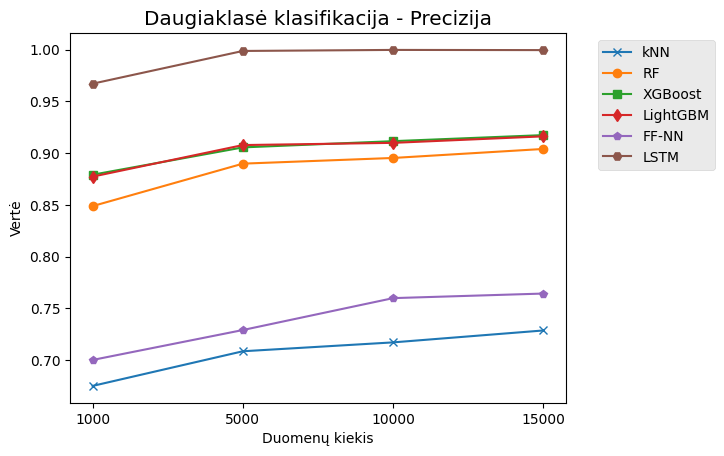

In [12]:
plot_time_series(mc_precision, "Daugiaklasė klasifikacija - Precizija")

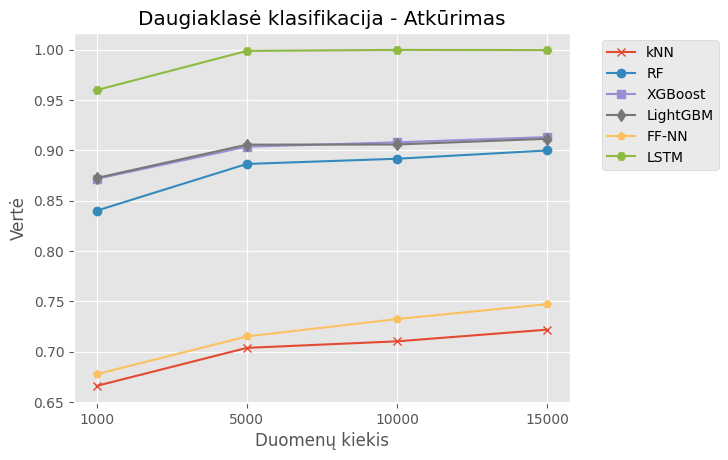

In [13]:
plot_time_series(mc_recall, "Daugiaklasė klasifikacija - Atkūrimas")

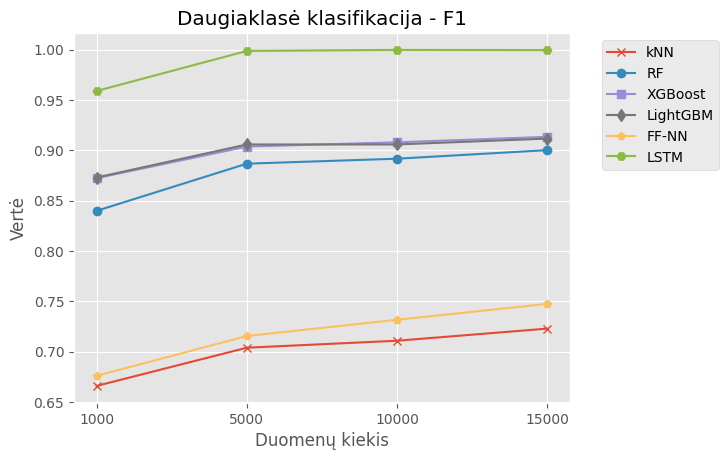

In [14]:
plot_time_series(mc_f1, "Daugiaklasė klasifikacija - F1")

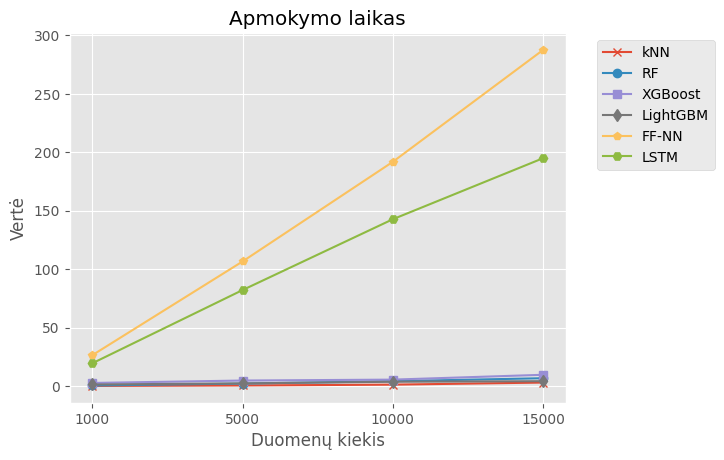

In [15]:
plot_time_series(mc_time, "Apmokymo laikas")

# Results by class

## Precision

In [16]:
benign_precision, bruteforce_precision, ddos_precision, dos_precision, mirai_precision, recon_precision, spoofing_precision, web_precision = [{} for x in range(8)]

In [17]:
new_dict = load_data('results_1000_precision.txt')
precision_1000 = pd.DataFrame(new_dict).transpose().to_dict()

benign_precision['1000'] = precision_1000['Benign']
bruteforce_precision['1000'] = precision_1000['Bruteforce']
ddos_precision['1000'] = precision_1000['DDoS']
dos_precision['1000'] = precision_1000['DoS']
mirai_precision['1000'] = precision_1000['Mirai']
recon_precision['1000'] = precision_1000['Recon']
spoofing_precision['1000'] = precision_1000['Spoofing']
web_precision['1000'] = precision_1000['Web']

In [18]:
new_dict = load_data('results_5000_precision.txt')
precision_5000 = pd.DataFrame(new_dict).transpose().to_dict()

benign_precision['5000'] = precision_5000['Benign']
bruteforce_precision['5000'] = precision_5000['Bruteforce']
ddos_precision['5000'] = precision_5000['DDoS']
dos_precision['5000'] = precision_5000['DoS']
mirai_precision['5000'] = precision_5000['Mirai']
recon_precision['5000'] = precision_5000['Recon']
spoofing_precision['5000'] = precision_5000['Spoofing']
web_precision['5000'] = precision_5000['Web']

In [19]:
new_dict = load_data('results_10000_precision.txt')
precision_10000 = pd.DataFrame(new_dict).transpose().to_dict()

benign_precision['10000'] = precision_10000['Benign']
bruteforce_precision['10000'] = precision_10000['Bruteforce']
ddos_precision['10000'] = precision_10000['DDoS']
dos_precision['10000'] = precision_10000['DoS']
mirai_precision['10000'] = precision_10000['Mirai']
recon_precision['10000'] = precision_10000['Recon']
spoofing_precision['10000'] = precision_10000['Spoofing']
web_precision['10000'] = precision_10000['Web']

In [20]:
new_dict = load_data('results_15000_precision.txt')
precision_15000 = pd.DataFrame(new_dict).transpose().to_dict()

benign_precision['15000'] = precision_15000['Benign']
bruteforce_precision['15000'] = precision_15000['Bruteforce']
ddos_precision['15000'] = precision_15000['DDoS']
dos_precision['15000'] = precision_15000['DoS']
mirai_precision['15000'] = precision_15000['Mirai']
recon_precision['15000'] = precision_15000['Recon']
spoofing_precision['15000'] = precision_15000['Spoofing']
web_precision['15000'] = precision_15000['Web']

## Recall

In [21]:
benign_recall, bruteforce_recall, ddos_recall, dos_recall, mirai_recall, recon_recall, spoofing_recall, web_recall = [{} for x in range(8)]

In [22]:
new_dict = load_data('results_1000_recall.txt')
recall_1000 = pd.DataFrame(new_dict).transpose().to_dict()

benign_recall['1000'] = recall_1000['Benign']
bruteforce_recall['1000'] = recall_1000['Bruteforce']
ddos_recall['1000'] = recall_1000['DDoS']
dos_recall['1000'] = recall_1000['DoS']
mirai_recall['1000'] = recall_1000['Mirai']
recon_recall['1000'] = recall_1000['Recon']
spoofing_recall['1000'] = recall_1000['Spoofing']
web_recall['1000'] = recall_1000['Web']

In [23]:
new_dict = load_data('results_5000_recall.txt')
recall_5000 = pd.DataFrame(new_dict).transpose().to_dict()

benign_recall['5000'] = recall_5000['Benign']
bruteforce_recall['5000'] = recall_5000['Bruteforce']
ddos_recall['5000'] = recall_5000['DDoS']
dos_recall['5000'] = recall_5000['DoS']
mirai_recall['5000'] = recall_5000['Mirai']
recon_recall['5000'] = recall_5000['Recon']
spoofing_recall['5000'] = recall_5000['Spoofing']
web_recall['5000'] = recall_5000['Web']

In [24]:
new_dict = load_data('results_10000_recall.txt')
recall_10000 = pd.DataFrame(new_dict).transpose().to_dict()

benign_recall['10000'] = recall_10000['Benign']
bruteforce_recall['10000'] = recall_10000['Bruteforce']
ddos_recall['10000'] = recall_10000['DDoS']
dos_recall['10000'] = recall_10000['DoS']
mirai_recall['10000'] = recall_10000['Mirai']
recon_recall['10000'] = recall_10000['Recon']
spoofing_recall['10000'] = recall_10000['Spoofing']
web_recall['10000'] = recall_10000['Web']

In [25]:
new_dict = load_data('results_15000_recall.txt')
recall_15000 = pd.DataFrame(new_dict).transpose().to_dict()

benign_recall['15000'] = recall_15000['Benign']
bruteforce_recall['15000'] = recall_15000['Bruteforce']
ddos_recall['15000'] = recall_15000['DDoS']
dos_recall['15000'] = recall_15000['DoS']
mirai_recall['15000'] = recall_15000['Mirai']
recon_recall['15000'] = recall_15000['Recon']
spoofing_recall['15000'] = recall_15000['Spoofing']
web_recall['15000'] = recall_15000['Web']

# F1

In [26]:
benign_f1, bruteforce_f1, ddos_f1, dos_f1, mirai_f1, recon_f1, spoofing_f1, web_f1 = [{} for x in range(8)]

In [27]:
new_dict = load_data('results_1000_f1.txt')
f1_1000 = pd.DataFrame(new_dict).transpose().to_dict()

benign_f1['1000'] = f1_1000['Benign']
bruteforce_f1['1000'] = f1_1000['Bruteforce']
ddos_f1['1000'] = f1_1000['DDoS']
dos_f1['1000'] = f1_1000['DoS']
mirai_f1['1000'] = f1_1000['Mirai']
recon_f1['1000'] = f1_1000['Recon']
spoofing_f1['1000'] = f1_1000['Spoofing']
web_f1['1000'] = f1_1000['Web']

In [28]:
new_dict = load_data('results_5000_f1.txt')
f1_5000 = pd.DataFrame(new_dict).transpose().to_dict()

benign_f1['5000'] = f1_5000['Benign']
bruteforce_f1['5000'] = f1_5000['Bruteforce']
ddos_f1['5000'] = f1_5000['DDoS']
dos_f1['5000'] = f1_5000['DoS']
mirai_f1['5000'] = f1_5000['Mirai']
recon_f1['5000'] = f1_5000['Recon']
spoofing_f1['5000'] = f1_5000['Spoofing']
web_f1['5000'] = f1_5000['Web']

In [29]:
new_dict = load_data('results_10000_f1.txt')
f1_10000 = pd.DataFrame(new_dict).transpose().to_dict()

benign_f1['10000'] = f1_10000['Benign']
bruteforce_f1['10000'] = f1_10000['Bruteforce']
ddos_f1['10000'] = f1_10000['DDoS']
dos_f1['10000'] = f1_10000['DoS']
mirai_f1['10000'] = f1_10000['Mirai']
recon_f1['10000'] = f1_10000['Recon']
spoofing_f1['10000'] = f1_10000['Spoofing']
web_f1['10000'] = f1_10000['Web']

In [30]:
new_dict = load_data('results_15000_f1.txt')
f1_15000 = pd.DataFrame(new_dict).transpose().to_dict()

benign_f1['15000'] = f1_15000['Benign']
bruteforce_f1['15000'] = f1_15000['Bruteforce']
ddos_f1['15000'] = f1_15000['DDoS']
dos_f1['15000'] = f1_15000['DoS']
mirai_f1['15000'] = f1_15000['Mirai']
recon_f1['15000'] = f1_15000['Recon']
spoofing_f1['15000'] = f1_15000['Spoofing']
web_f1['15000'] = f1_15000['Web']

# Plot results by class

## Precision

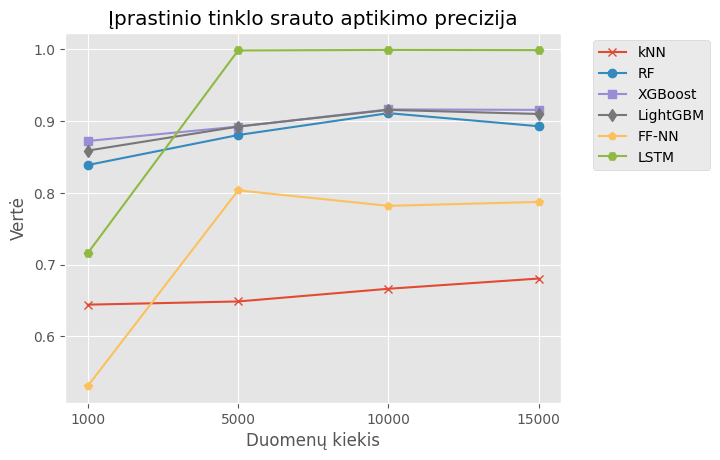

In [31]:
benign_precision = pd.DataFrame(benign_precision).transpose()
plot_time_series(benign_precision, "Įprastinio tinklo srauto aptikimo precizija")

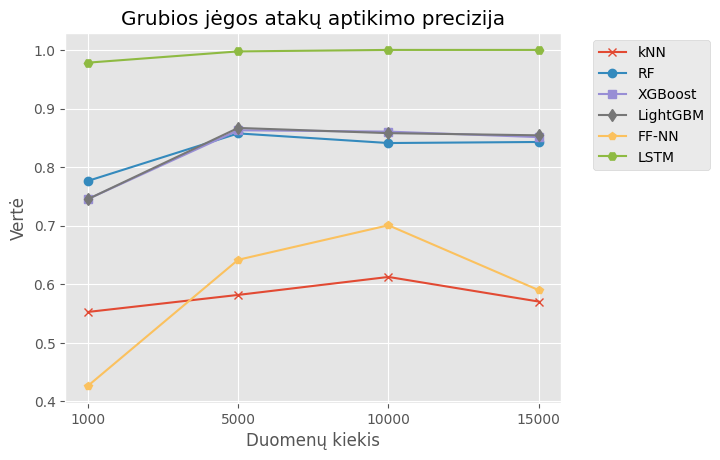

In [32]:
bruteforce_precision = pd.DataFrame(bruteforce_precision).transpose()
plot_time_series(bruteforce_precision, "Grubios jėgos atakų aptikimo precizija")

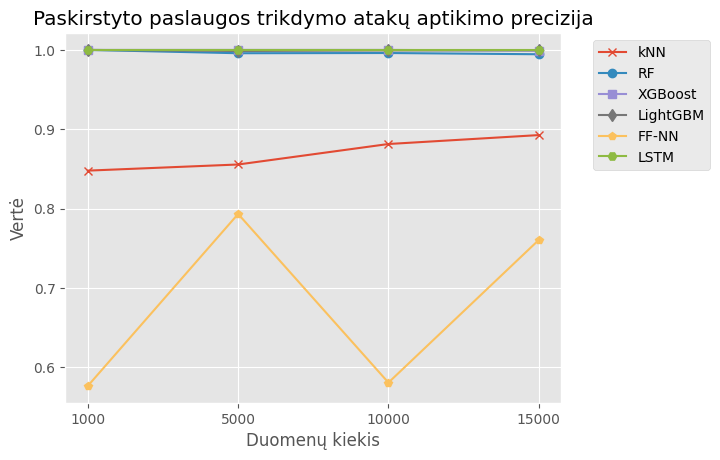

In [33]:
ddos_precision = pd.DataFrame(ddos_precision).transpose()
plot_time_series(ddos_precision, "Paskirstyto paslaugos trikdymo atakų aptikimo precizija")

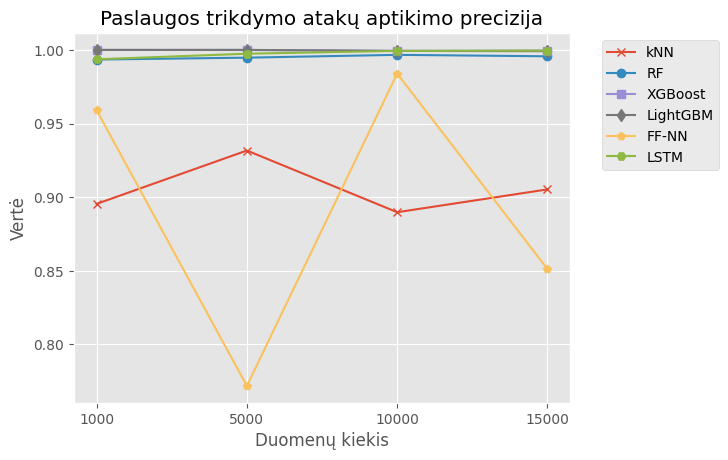

In [34]:
dos_precision = pd.DataFrame(dos_precision).transpose()
plot_time_series(dos_precision, "Paslaugos trikdymo atakų aptikimo precizija")

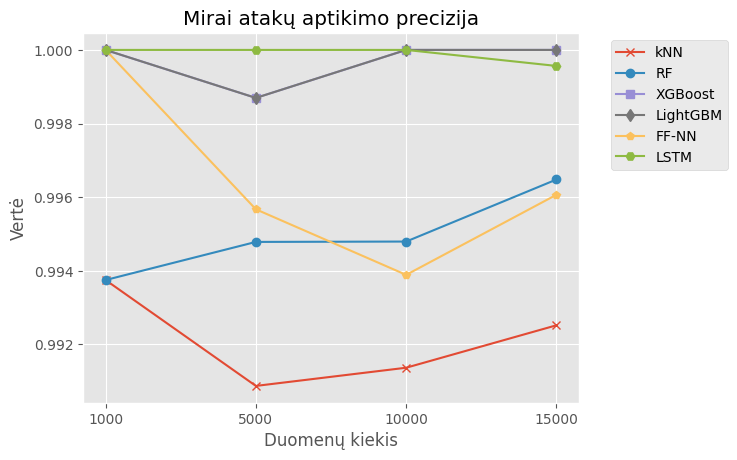

In [35]:
mirai_precision = pd.DataFrame(mirai_precision).transpose()
plot_time_series(mirai_precision, "Mirai atakų aptikimo precizija")

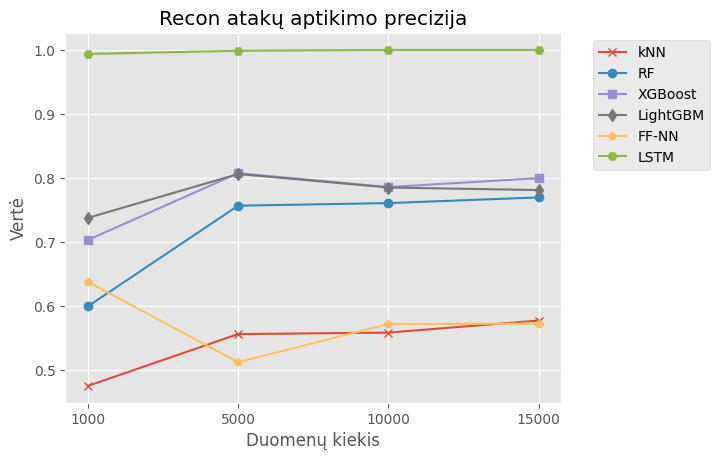

In [36]:
recon_precision = pd.DataFrame(recon_precision).transpose()
plot_time_series(recon_precision, "Recon atakų aptikimo precizija")

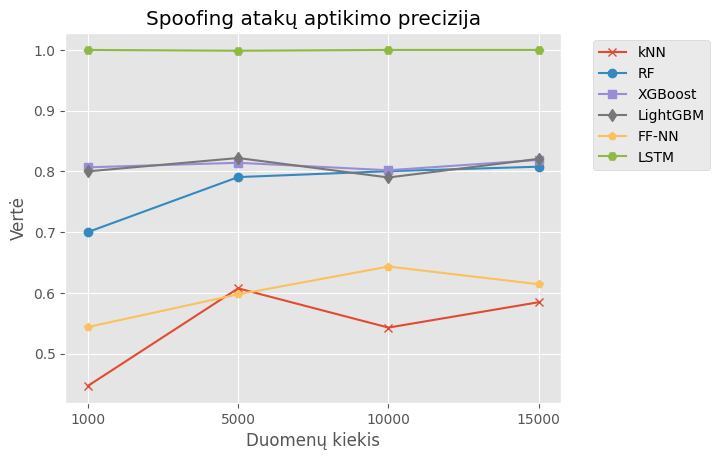

In [37]:
spoofing_precision = pd.DataFrame(spoofing_precision).transpose()
plot_time_series(spoofing_precision, "Spoofing atakų aptikimo precizija")

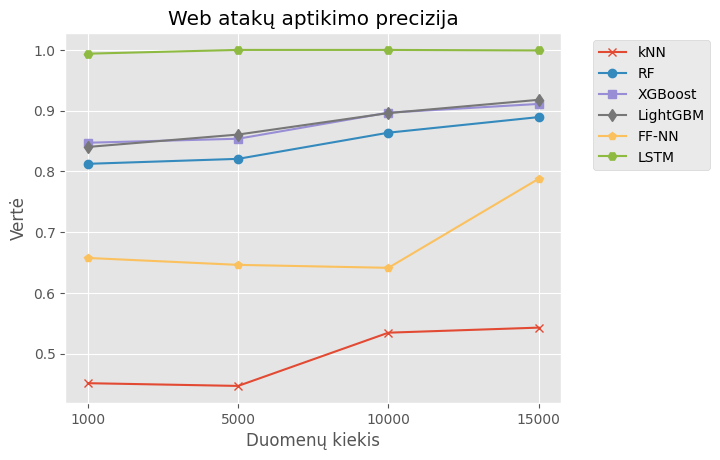

In [38]:
web_precision = pd.DataFrame(web_precision).transpose()
plot_time_series(web_precision, "Web atakų aptikimo precizija")

## Recall

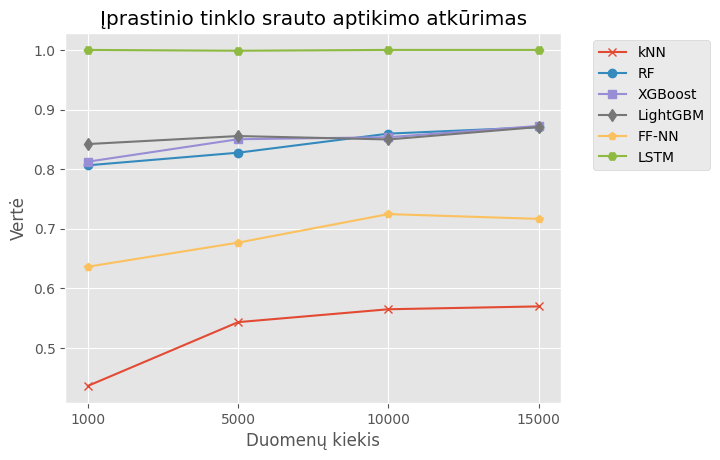

In [39]:
benign_recall = pd.DataFrame(benign_recall).transpose()
plot_time_series(benign_recall, "Įprastinio tinklo srauto aptikimo atkūrimas")

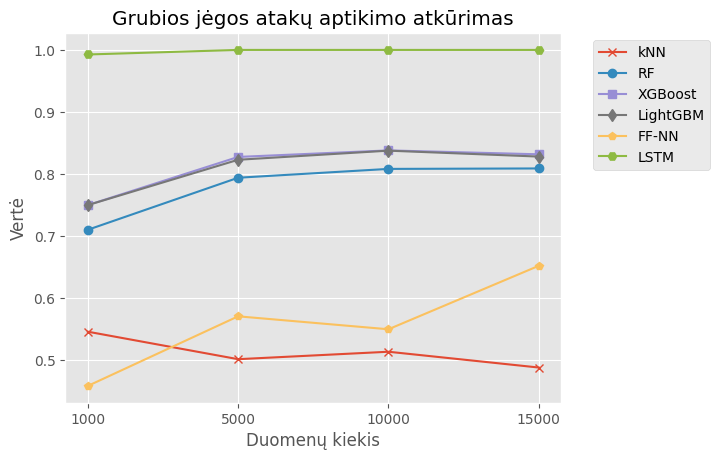

In [40]:
bruteforce_recall = pd.DataFrame(bruteforce_recall).transpose()
plot_time_series(bruteforce_recall, "Grubios jėgos atakų aptikimo atkūrimas")

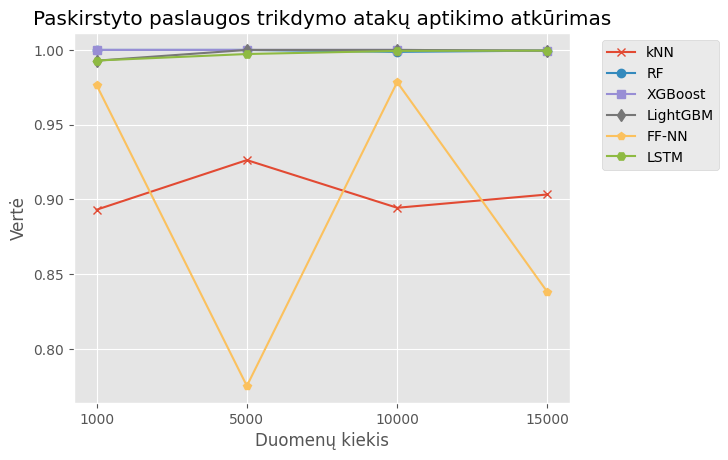

In [41]:
ddos_recall = pd.DataFrame(ddos_recall).transpose()
plot_time_series(ddos_recall, "Paskirstyto paslaugos trikdymo atakų aptikimo atkūrimas")

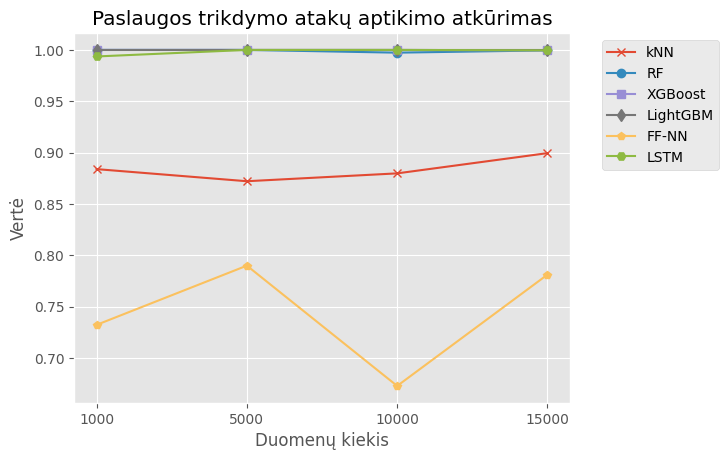

In [42]:
dos_recall = pd.DataFrame(dos_recall).transpose()
plot_time_series(dos_recall, "Paslaugos trikdymo atakų aptikimo atkūrimas")

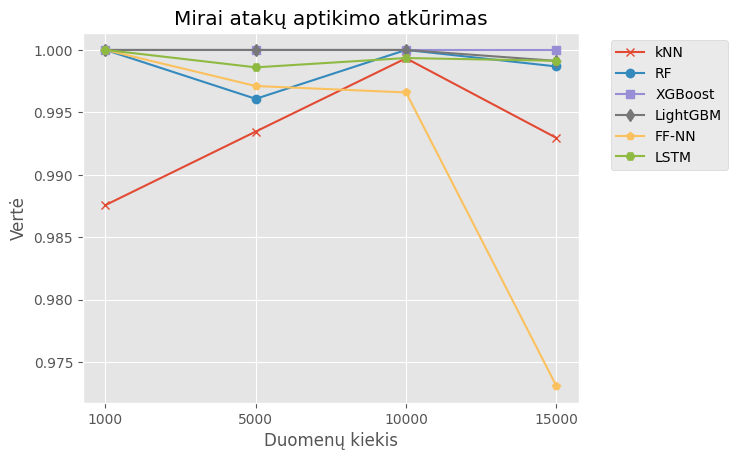

In [43]:
mirai_recall = pd.DataFrame(mirai_recall).transpose()
plot_time_series(mirai_recall, "Mirai atakų aptikimo atkūrimas")

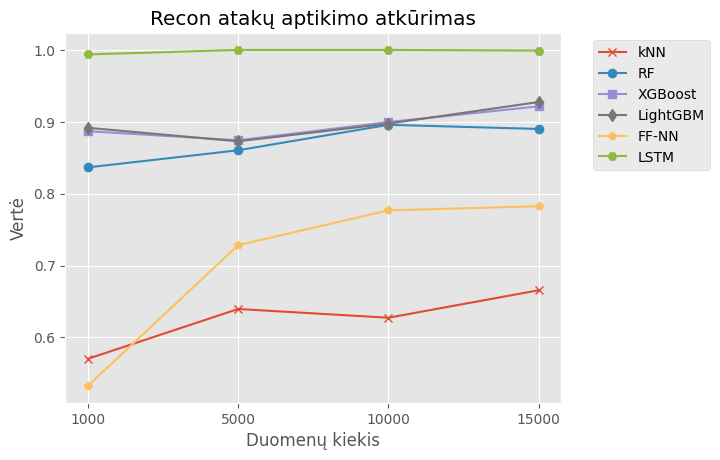

In [44]:
recon_recall = pd.DataFrame(recon_recall).transpose()
plot_time_series(recon_recall, "Recon atakų aptikimo atkūrimas")

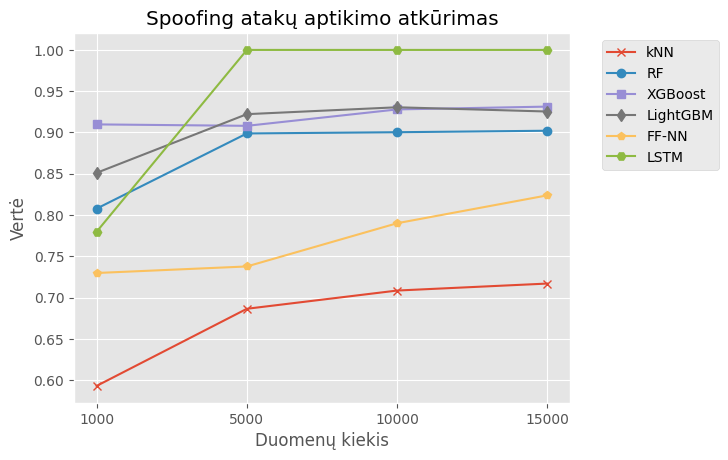

In [45]:
spoofing_recall = pd.DataFrame(spoofing_recall).transpose()
plot_time_series(spoofing_recall, "Spoofing atakų aptikimo atkūrimas")

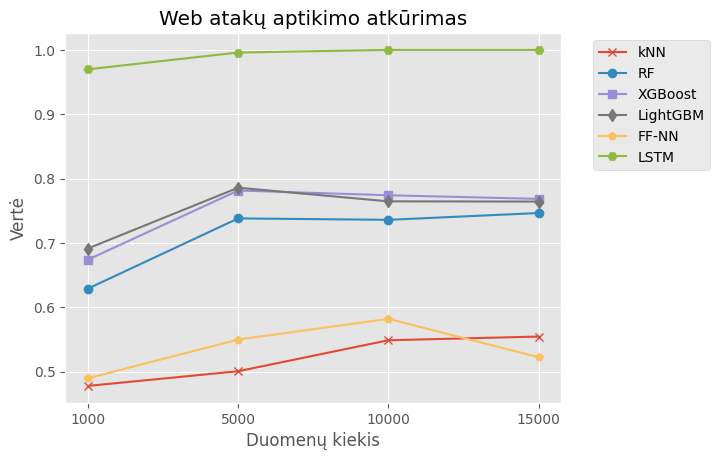

In [46]:
web_recall = pd.DataFrame(web_recall).transpose()
plot_time_series(web_recall, "Web atakų aptikimo atkūrimas")

## F1

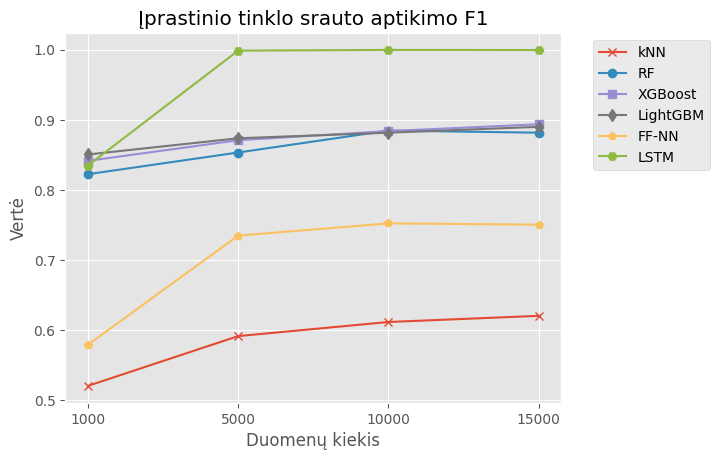

In [47]:
benign_f1 = pd.DataFrame(benign_f1).transpose()
plot_time_series(benign_f1, "Įprastinio tinklo srauto aptikimo F1")

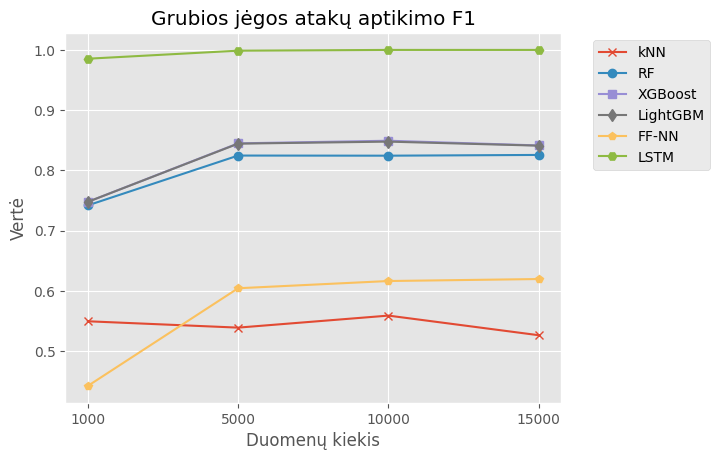

In [48]:
bruteforce_f1 = pd.DataFrame(bruteforce_f1).transpose()
plot_time_series(bruteforce_f1, "Grubios jėgos atakų aptikimo F1")

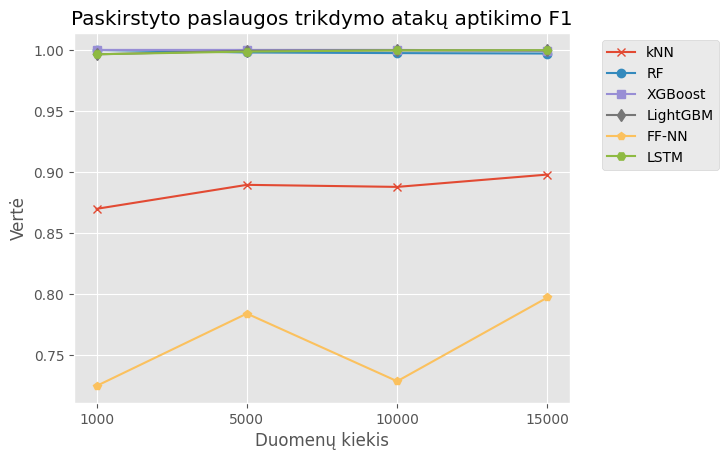

In [49]:
ddos_f1 = pd.DataFrame(ddos_f1).transpose()
plot_time_series(ddos_f1, "Paskirstyto paslaugos trikdymo atakų aptikimo F1")

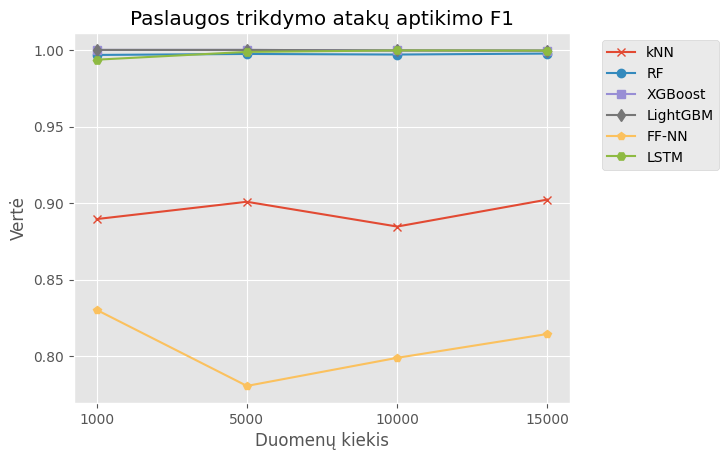

In [50]:
dos_f1 = pd.DataFrame(dos_f1).transpose()
plot_time_series(dos_f1, "Paslaugos trikdymo atakų aptikimo F1")

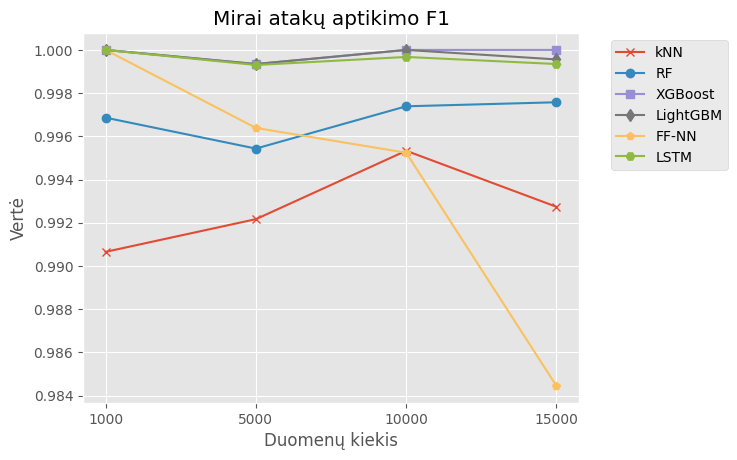

In [51]:
mirai_f1 = pd.DataFrame(mirai_f1).transpose()
plot_time_series(mirai_f1, "Mirai atakų aptikimo F1")

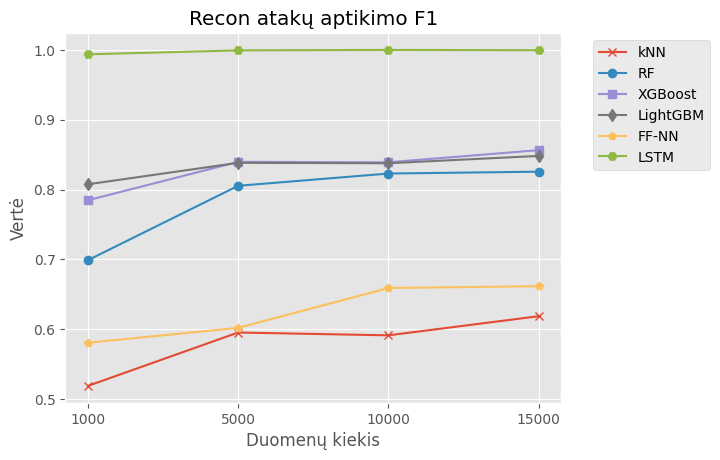

In [52]:
recon_f1 = pd.DataFrame(recon_f1).transpose()
plot_time_series(recon_f1, "Recon atakų aptikimo F1")

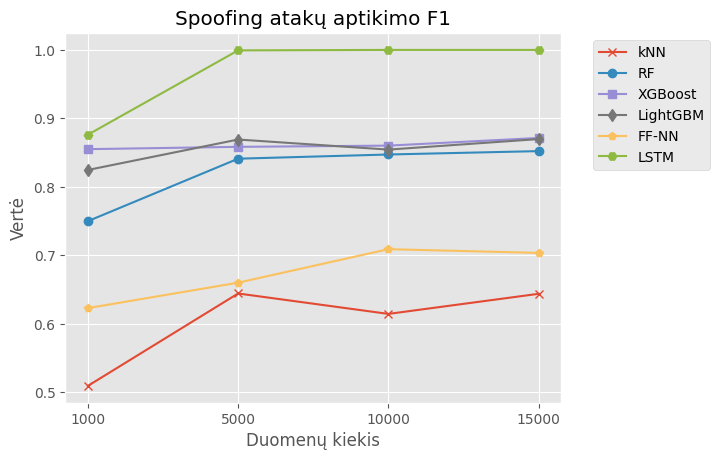

In [53]:
spoofing_f1 = pd.DataFrame(spoofing_f1).transpose()
plot_time_series(spoofing_f1, "Spoofing atakų aptikimo F1")

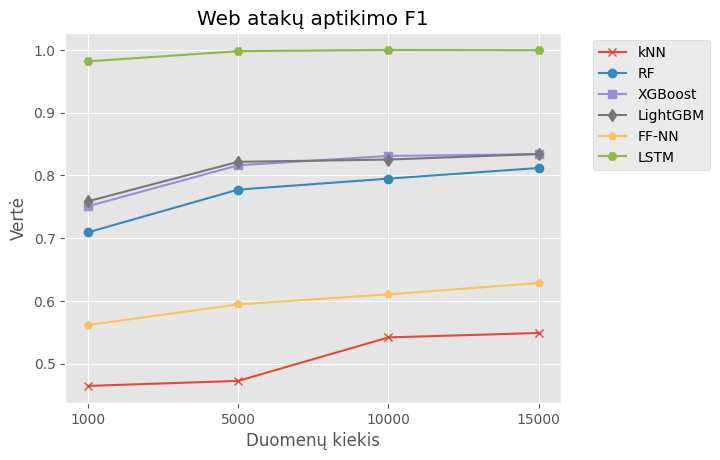

In [54]:
web_f1 = pd.DataFrame(web_f1).transpose()
plot_time_series(web_f1, "Web atakų aptikimo F1")